In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [15]:
# Load the dataset
df = pd.read_csv('Social_Network_Ads.csv')

# View the first few rows
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [16]:
# Features and Target
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [17]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [19]:
y_pred = model.predict(X_test_scaled)

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:\n", cm)
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Confusion Matrix:
 [[61  2]
 [12 25]]
True Positives (TP): 25
False Positives (FP): 2
True Negatives (TN): 61
False Negatives (FN): 12

Accuracy: 0.86
Error Rate: 0.14
Precision: 0.93
Recall: 0.68
F1 Score: 0.78


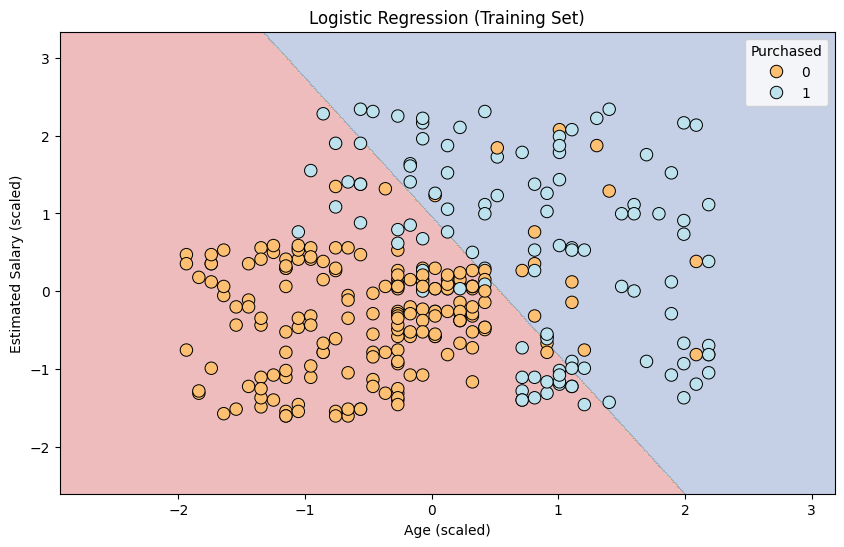

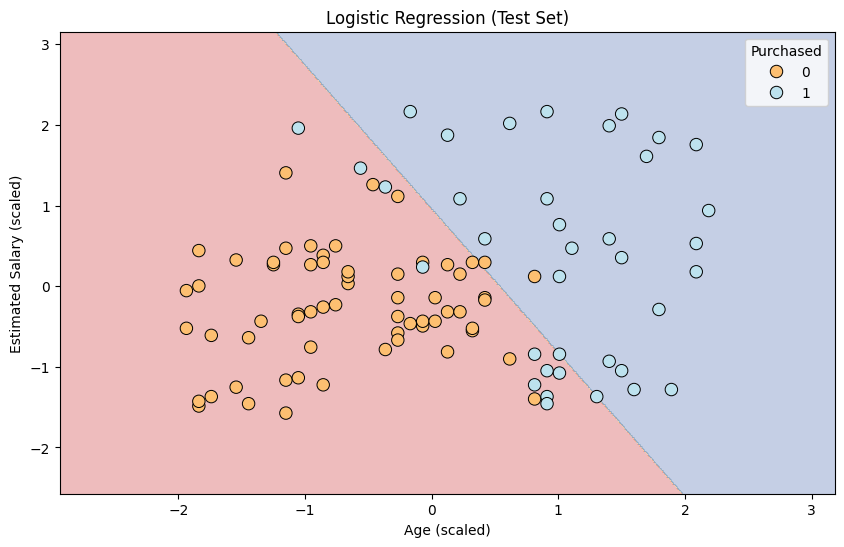

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Function to plot decision boundary
def plot_decision_boundary(X_set, y_set, model, title):
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
    )

    Z = model.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Z = Z.reshape(X1.shape)

    plt.contourf(X1, X2, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    # plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=plt.cm.RdYlBu, edgecolor='k')
    sns.scatterplot(
        x=X_set[:, 0],
        y=X_set[:, 1],
        hue=y_set,
        palette='RdYlBu',
        edgecolor='black',
        s=80,
        legend='full'
    )
    plt.title(title)
    plt.xlabel("Age (scaled)")
    plt.ylabel("Estimated Salary (scaled)")
    plt.show()

# Plot decision boundary for the training set
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train_scaled, y_train, model, "Logistic Regression (Training Set)")

# Plot decision boundary for the test set
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_test_scaled, y_test, model, "Logistic Regression (Test Set)")
